< GRUPO 7 >

PILAR ARIAS, ÁLVARO GARCÍA CID, YEDRA MARTÍN, AMAYA SARASA

# Instalamos la librería Deap

In [52]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

In [58]:
# Importamos la librería
import random
# Fijamos la semilla. Si no cambiamos la semilla, 
# la función generará los mismos número aleatorios
random.seed(0)
# Generamos los números pseudo-aleatorios en 2 list comprenhension
# para encapsular todos los datos en las listas x e y
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


In [59]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Problema por resolver:

Se desean Encontrar los **máximos** de la función "picos"

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio $$\{x,y\} \in [-100,100]$$

Definimos la **función objetivo**

Para poder introducir correctamente esta función, se ha partido en diferentes segmentos para su correcta ejecución.

In [60]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res1 = (1-x[0])**2
    res2 = np.exp(-(x[0]**2+(x[1]+1)**2))
    res3 = x[0]/5-x[0]**3-x[1]**5
    res4 = np.exp(-(x[0]**2)-(x[1]**2))
    res5 = (1/3)*np.exp(-((x[0]+1)**2)-x[1]**2)
    res = 3* res1 * res2 - 10 * res3 * res4 - res5
    return res

Generamos vectores para comenzar la exploración del máximo de la función.

Intentaremos ajustar los parámetros lo máximo posible entorno a los valores que sabemos contendrán los máximos de la función.

Para ello usaremos la función ``linspace`` que crea secuencias de valores espaciados uniformemente dentro de un intervalo definido. Esencialmente, especifica un punto de inicio y un punto final de un intervalo, y luego especifica el número total de puntos de interrupción que desea dentro de ese intervalo (incluidos los puntos inicial y final).

En este caso creamos una matriz de 1 000 números espaciados uniformemente en el intervalo [-5, 5].

In [61]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
# print('x= ', x)
# print('y= ', y)

La función **numpy.meshgrid** devuelve dos matrices bidimensionales que representan las coordenadas X e Y de todos los puntos. 

In [62]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
print("x_ax = ")
print(x_ax)
print("y_ax = ")
print(y_ax)       


x_ax = 
[[-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 ...
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]]
y_ax = 
[[-5.         -5.         -5.         ... -5.         -5.
  -5.        ]
 [-4.98998999 -4.98998999 -4.98998999 ... -4.98998999 -4.98998999
  -4.98998999]
 [-4.97997998 -4.97997998 -4.97997998 ... -4.97997998 -4.97997998
  -4.97997998]
 ...
 [ 4.97997998  4.97997998  4.97997998 ...  4.97997998  4.97997998
   4.97997998]
 [ 4.98998999  4.98998999  4.98998999 ...  4.98998999  4.98998999
   4.98998999]
 [ 5.          5.          5.         ...  5.          5.
   5.        ]]


**numpy.c_** Traslada objetos de división a concatenación a lo largo del segundo eje.

**numpy.ravel** Devuelve una matriz 1-D aplanada contigua que contiene los elementos de la entrada. 

In [63]:
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
vals.shape

(1000000, 2)

Hacemos que los valores tomen una forma distinta

In [64]:
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))
fx.shape

(1000, 1000)

Representamos la función para orientarnos sobre dónde estará ese máximo global que se está buscando.

**matplotlib.pyplot.figure** Crea una nueva gráfica o active una función existente.

Text(0.5, 0, 'f(x,y)')

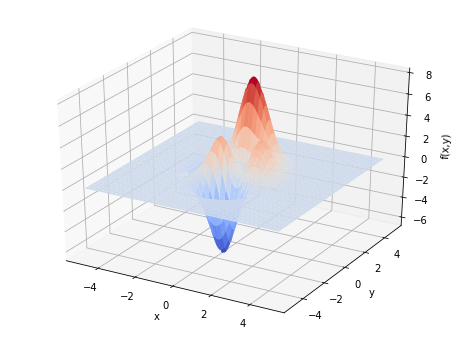

In [65]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6)) # figsize determina el tamaño en pulgadas de la imagen
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

#A continuación

1. Definiremos el problema y generaremos la población inicial

2. Veremos la función objetivo y los operadores genéticos

3. Como configurar el algoritmo genético y la representación de los resultados del algoritmo.


##Creación del problema 

Importamos las librerías necesarias

In [66]:
import random
from deap import base
from deap import creator
from deap import tools


Creamos una nueva clase llamada `name=FitnessMax`, que hereda de `base=base.Fitness` y que tiene un atributo llamado `attribute=weights=1.0` en nuestro caso puesto que nuestro único objetivo es la maximización. 


In [67]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


###Creación de la plantilla del individuo 

Creamos el **tipo de individuo** y sus atributos. 

Simplemente al pensar en los diferentes tipos de algoritmos evolutivos (GA, GP, ES, PSO, DE, …), notamos que es posible una variedad extremadamente grande de individuos, por lo tanto nosotros mismos crearemos un individuo que satisfaga nuestros requerimiento usando el creador e inicializándolas usando una Caja de herramientas.

Para producir el primer individuo, necesitamos crear una clase `Individual` usando el creador, heredado de ``list`` y tendrá el  atributo `fitness`

In [68]:
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### Creación de individuos aleatorios y población inicial

Usaremos el `Toolbox` que contendrá, mediante 
**registro**, un conjunto de funciones utilizadas por el algoritmo durante 
su ejecución.

In [69]:
toolbox = base.Toolbox()

En el `Toolbox` registraremos funciones necesarias para ejecutar el AG.

Crearemos **individuos aleatorios** usando la función`random.uniform` que nos permita generar un valor aleatorio para cada variable independiente (cada gen del comosoma), esto es, cada una de las posiciones de la lista con valores sujetos a las restricciones de nuestro problema (-100, 100)

In [70]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [71]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

-37.970486136133474

Creamos el individuo completo llamando a la función que genera cada uno de los individuos tantas veces como variables independientes tengamos. 

In [72]:
# Generación de inviduos
toolbox.register("individual", 
                 tools.initRepeat, 
                 creator.Individual,
                 toolbox.attr_uniform, 2) #2 = Número de veces que se llamará a la función; 2 cromosomas a crear

In [73]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

In [74]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

###Generación de la población

In [75]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 100)

In [76]:
poblacion = toolbox.population()
print(poblacion)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [77]:
poblacion[0]

[36.79678638308826, -5.571456909457325]

In [78]:
poblacion[0].fitness.values

()

###Función objetivo y operadores genéticos

Creamos nuestra **función objetivo** 

In [79]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res1 = (1-x[0])**2
    res2 = np.exp(-(x[0]**2+(x[1]+1)**2))
    res3 = x[0]/5-x[0]**3-x[1]**5
    res4 = np.exp(-(x[0]**2)-(x[1]**2))
    res5 = (1/3)*np.exp(-((x[0]+1)**2)-x[1]**2)
    res = 3* res1 * res2 - 10 * res3 * res4 - res5
    return res,


Ahora, registramos la función de fitness

In [80]:
toolbox.register("evaluate", funcion_objetivo)

Comprobamos el individuo generado

In [81]:
individuo

[45.96634965202574, 79.7676575935987]

In [82]:
# Ejemplo de uso 1
funcion_objetivo(individuo)

(0.0,)

In [83]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(0.0,)

#Distintos puntos de cruce

**Crossover** es un operador genético utilizado para variar la programación de un cromosoma o cromosomas de una generación a la siguiente. 

Crossover es reproducción sexual. Se seleccionan al azar dos hilos del grupo de apareamiento para cruzarlos y producir una descendencia superior. 

Veremos 3 tipos distintos de cruces:

1. **Punto de cruce único**: Se selecciona un punto de cruce en la cadena del organismo principal. Todos los datos más allá de ese punto en la cadena del organismo se intercambian entre los dos organismos principales. Las cadenas se caracterizan por el sesgo posicional.

2. **Crossover de Dos Puntos**: Se eligen dos puntos aleatorios en los cromosomas individuales (cadenas) y el material genético se intercambia en estos puntos.

3. **Cruce uniforme**: cada gen (bit) se selecciona aleatoriamente de uno de los genes correspondientes de los cromosomas originales.


## Un único punto de cruce 

###**MUTACIÓN** 

In [84]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxOnePoint)

Utilizamos el operador `mutGaussian` (mutación Gaussiana) con una media de 0 y una deviación típica de 5

In [85]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

`MutGaussian(individual, mu, sigma, indpb)` 

Consiste en mutar, con una probabilidad `indpb` cada uno de los genes del individuo `individual`, sumando a cada uno de ellos una cierta cantidad aleatoria. 

Esta cantidad se genera según una función de probabilidad Gaussiana (o normal), de media `mu` y desviación típica `sigma`

`indpb`: La probabilidad  de mutar cada uno de los genes del individuo

En general, debe ser bajo para que la mutación no modifique en exceso al individuo. Valores muy altos de esta probabilidad pueden hacer que el algoritmo no converja correctamente, o que no se intensifiquen ciertas zonas del espacio de búsqueda.

###**SELECCIÓN** 

In [86]:
toolbox.register("select", tools.selTournament, tournsize=3)

Usamos el operador `selTournament(individuals, k, tournsize)` que nos permite realizar una **selección mediante torneo**. 

Fijamos un tamaño igual a 3, puesto que se ha demostrado que este tamaño funciona relativamente bien para la mayoría de los casos.

Al final del torneo, se habrán clasificiado los 3 mejores individuos.

La *selección mediante torneo* tiene una ventaja, y es que al ser un proceso muy elitista (puesto que solo participan en las operaciones genéticas los ganadores /mejores individuos) hace que el algoritmo converja más rápidamente.

In [87]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

Configuramos el algoritmo genético

In [88]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

Resultados del Algoritmo Genético

gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

<ipython-input-87-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


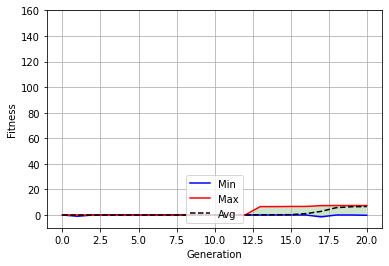

In [89]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

## Cruce con dos puntos

In [90]:
# Registro de operacion genética de cruce
#toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mate", tools.cxTwoPoint)
#toolbox.register("mate", tools.cxUniform)

In [91]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [92]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [93]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [94]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-93-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	55    	9.69215e-50	4.2247e-49 	-5.6445e-140	1.93843e-48
2  	54    	-2.77757e-10	2.76365e-09	-2.77757e-08	9.62191e-38
3  	54    	1.39112e-25 	1.38414e-24	0           	1.39112e-23
4  	43    	-2.77757e-10	2.76365e-09	-2.77757e-08	1.39112e-23
5  	61    	9.2011e-15  	6.63727e-14	0           	5.84792e-13
6  	64    	-8.5687e-05 	0.000852575	-0.0085687  	5.84792e-13
7  	61    	0.00101441  	0.0100932  	4.41527e-65 	0.101441   
8  	51    	0.0653251   	0.617144   	-6.94448e-08	6.20338    
9  	55    	0.197282    	1.05693    	-6.23852e-14	6.20338    
10 	58    	0.617602    	1.87859    	-2.43588    	6.20338    
11 	59    	1.79351     	2.75949    	-9.91273e-17	6.20338    
12 	52    	4.34659     	2.78739    	-0.491237   	6.20338    
13 	66    	5.90065     	1.27026    	9.62e-33    	6.20338    
14 	60    	5.84401     	1.62766    	-4.9379     	6.20338    
15 	65    	5.86283     	1.5

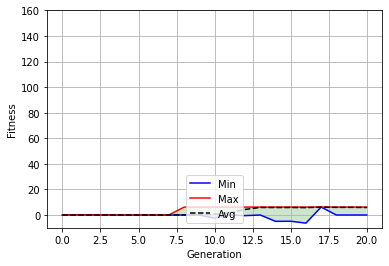

In [95]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

## Cruce uniforme

Ahora probaremos lo mismo que antes, pero con un cruce uniforme. Los atributos se intercambian según la probabilidad indpb, que en este caso, le hemos dado el valor de 0.4

In [96]:
toolbox.register("mate", tools.cxUniform, indpb=0.4)

In [97]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [98]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [99]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [100]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-99-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	48    	1.16306e-49	4.60351e-49	0           	1.93843e-48
2  	58    	9.62191e-40	9.57368e-39	-8.02396e-118	9.62191e-38
3  	57    	-2.77757e-10	2.76365e-09	-2.77757e-08 	1.39112e-23
4  	57    	2.79554e-25 	1.94742e-24	-6.09907e-315	1.39112e-23
5  	53    	1.30985e-21 	1.30258e-20	6.05943e-77  	1.30915e-19
6  	66    	1.11789e-14 	7.83303e-14	1.93843e-48  	5.84792e-13
7  	58    	4.6272e-14  	1.56966e-13	-1.87111e-79 	5.84792e-13
8  	61    	1.45692e-13 	2.52369e-13	-2.42373e-67 	5.84792e-13
9  	60    	0.000145264 	0.00144536 	1.06184e-29  	0.0145264  
10 	59    	0.000145424 	0.00144534 	8.38211e-41  	0.0145264  
11 	63    	0.000720799 	0.00588412 	5.84792e-13  	0.0574737  
12 	60    	0.00613212  	0.0259094  	5.76469e-15  	0.224583   
13 	59    	0.0182194   	0.0441254  	5.84792e-13  	0.224583   
14 	55    	0.0851464   	0.581647   	-2.68795     	4.93978    
15 	67    	0.23

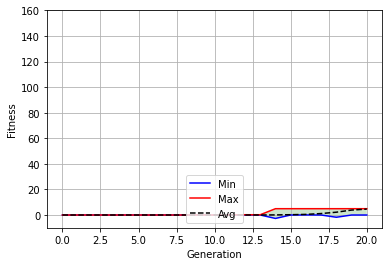

In [101]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

#Conclusiones

Compararemos las gráficas obtenidas según los 3 tipos distintos de cruces que hemos utilizados y analizaremos lo que significan.

**Un único punto de cruce**

Mejor fitness: 7.413065

Mejor individuo [0.06046700210138432, 1.7919972024804398]

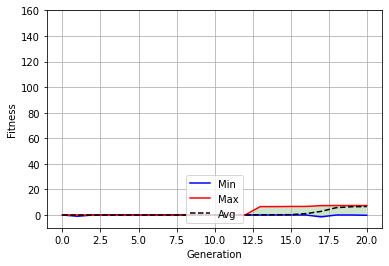

**Dos único punto de cruce**

Mejor fitness: 6.203384

Mejor individuo [0.11722261005967027, 1.9495037203322996]

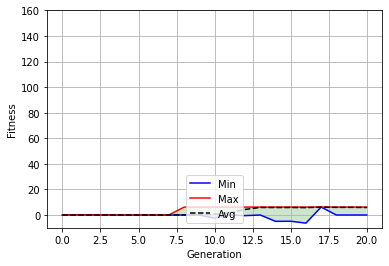

**Cruce uniforme**

Mejor fitness: 4.939777

Mejor individuo [0.11722261005967027, 2.0947319163367135]

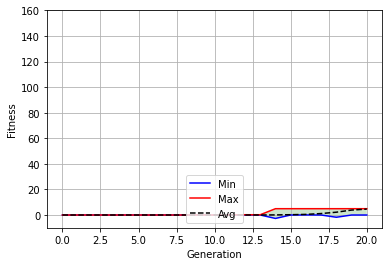

Podemos concluir que los **máximos** de la función "picos"


$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$


En el dominio 

$$\{x,y\} \in [-100,100]$$


El método de cruce que mejores resultados produce es aquel de solo un punto de cruce puesto que su mejor fitness (que representa un punto máximo de la función) tiene un valor de 7.413065, y puesto que nuestro objetivo es encontrar los máximos de la función es el método que mejor cumple la función que buscamos. 